## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math
import scipy.stats as ss

from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-darkgrid')

In [2]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Import Data

In [4]:
df = pd.read_csv("hotel_bookings_fe2.csv") 

In [5]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,family,stays,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,customer_type_Other,customer_type_Transient,customer_type_Transient-Party
0,0,0,342,2015,27,1,0,0,2,0.0,0,1,0,0,0,0,3,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,737,2015,27,1,0,0,2,0.0,0,1,0,0,0,0,4,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,7,2015,27,1,0,1,1,0.0,0,1,1,0,0,0,0,0,0,0,0,75.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,13,2015,27,1,0,1,1,0.0,0,1,1,0,0,0,0,0,1,0,0,75.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,14,2015,27,1,0,2,2,0.0,0,1,1,0,0,0,0,0,1,0,0,98.0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [6]:
df.shape

(119385, 60)

## Splitting Data

In [7]:
X = df.drop(columns=["is_canceled"])
y = df["is_canceled"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
kolom = X_test.columns
X_test.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'family',
       'stays', 'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'arrival_date_month_April',
       'arrival_date_month_August', 'arrival_date_month_December',
       'arrival_date_month_February', 'arrival_date_month_January',
       'arrival_date_month_July', 'arrival_date_month_June',
       'arrival_date_month_March', 'arrival_date_month_May',
       'arrival_date_month_November', 'arrival_date_month_O

## Scalling

In [10]:
rsc = RobustScaler()
X_train = rsc.fit_transform(X_train)
X_test = rsc.transform(X_test)

In [11]:
X_train = pd.DataFrame(X_train, columns=kolom)
X_test = pd.DataFrame(X_test, columns=kolom)

## Machine Learning Model

In [12]:
mod_eval = pd.DataFrame(columns=['Model','AUC','Recall','Threshold','Recall Threshold'])

### 1. Logistic Regression

In [13]:
lr = LogisticRegression(solver='lbfgs')

In [14]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_lr = lr.predict(X_test)

In [16]:
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86     15033
           1       0.81      0.63      0.71      8844

    accuracy                           0.81     23877
   macro avg       0.81      0.77      0.78     23877
weighted avg       0.81      0.81      0.80     23877



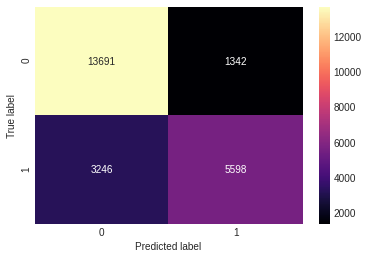

In [17]:
sns.heatmap(confusion_matrix(y_test, y_lr), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [18]:
probs = lr.predict_proba(X_test)
preds = probs[:, 1]

In [19]:
fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr, tpr),2)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.322424, G-Mean=0.796


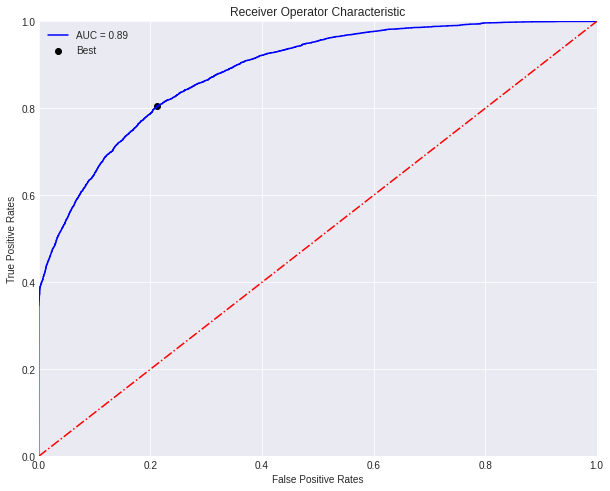

In [20]:
plt.figure(figsize=(10,8))

plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc}')
plt.plot([0,1], [0,1], 'r-.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [21]:
y_lrt = []
for i in range(len(preds)):
  if preds[i] > 0.376532:
    y_lrt.append(1)
  else:
    y_lrt.append(0)

y_lrt = np.array(y_lrt)

In [22]:
print(classification_report(y_test, y_lrt))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     15033
           1       0.73      0.75      0.74      8844

    accuracy                           0.80     23877
   macro avg       0.79      0.79      0.79     23877
weighted avg       0.80      0.80      0.80     23877



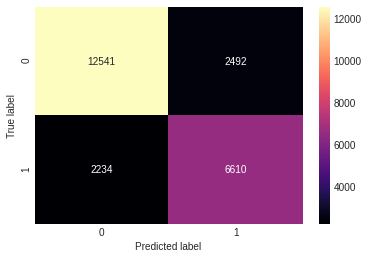

In [23]:
sns.heatmap(confusion_matrix(y_test, y_lrt), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [24]:
mod_eval.loc[0] = [
    'Logistic Regression',
    auc(fpr, tpr).round(5),
    recall_score(y_test, y_lr).round(5),
    threshold[ix].round(5),
    recall_score(y_test, y_lrt).round(5)
]

In [25]:
importance = lr.coef_[0]
fi = pd.DataFrame({'Feature': X_test.columns, 'Score': importance}).sort_values(by=['Score'], ascending=False)
fi

,Feature,Score
16,deposit_type,4.496454
13,previous_cancellations,4.076431
29,market_segment_Online TA,0.874731
1,lead_time,0.650018
57,customer_type_Transient,0.552444
52,distribution_channel_Corporate,0.514004
2,arrival_date_year,0.380102
17,agent,0.346034
20,adr,0.293543
0,hotel,0.233966


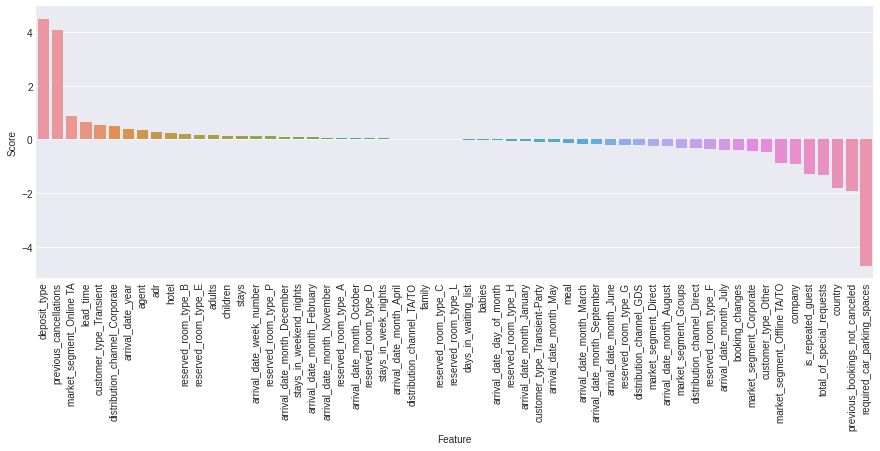

In [26]:
plt.figure(figsize=[15,5])
sns.barplot(x='Feature', y='Score', data=fi)
plt.xticks(rotation=90)
plt.show()

### 2. Stochastic Gradient Descent

In [27]:
sgd = SGDClassifier()
sgd = CalibratedClassifierCV(base_estimator=sgd)

In [28]:
sgd.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight=None,
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                      

In [29]:
y_sgd = sgd.predict(X_test)

In [30]:
print(classification_report(y_test, y_sgd))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86     15033
           1       0.90      0.50      0.65      8844

    accuracy                           0.80     23877
   macro avg       0.84      0.74      0.75     23877
weighted avg       0.82      0.80      0.78     23877



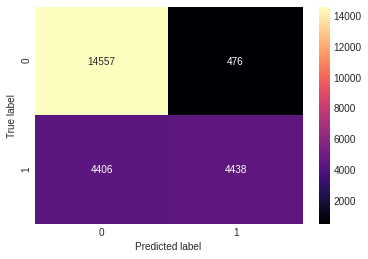

In [31]:
sns.heatmap(confusion_matrix(y_test, y_sgd), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [32]:
probs = sgd.predict_proba(X_test)
preds = probs[:, 1]

In [33]:
fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr, tpr),2)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.333817, G-Mean=0.790


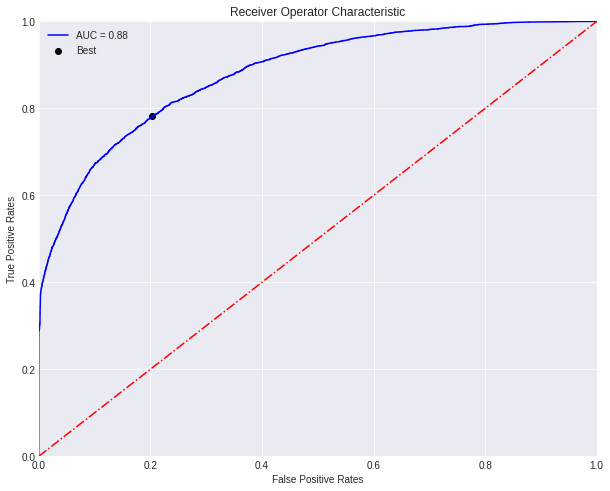

In [34]:
plt.figure(figsize=(10,8))

plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc}')
plt.plot([0,1], [0,1], 'r-.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [35]:
y_sgdt = []
for i in range(len(preds)):
  if preds[i] > threshold[ix]:
    y_sgdt.append(1)
  else:
    y_sgdt.append(0)

y_sgdt = np.array(y_sgdt)

In [36]:
print(classification_report(y_test, y_sgdt))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83     15033
           1       0.69      0.78      0.74      8844

    accuracy                           0.79     23877
   macro avg       0.78      0.79      0.78     23877
weighted avg       0.80      0.79      0.79     23877



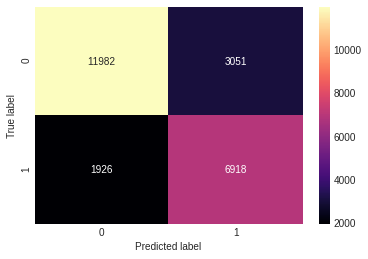

In [37]:
sns.heatmap(confusion_matrix(y_test, y_sgdt), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [38]:
mod_eval.loc[1] = [
    'Stochastic Gradient Descent',
    auc(fpr, tpr).round(5),
    recall_score(y_test, y_sgd).round(5),
    threshold[ix].round(5),
    recall_score(y_test, y_sgdt).round(5)
]

### 3. Decision Tree

In [39]:
dt = DecisionTreeClassifier()

In [40]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
y_dt = dt.predict(X_test)

In [42]:
print(classification_report(y_test, y_dt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     15033
           1       0.79      0.80      0.80      8844

    accuracy                           0.85     23877
   macro avg       0.84      0.84      0.84     23877
weighted avg       0.85      0.85      0.85     23877



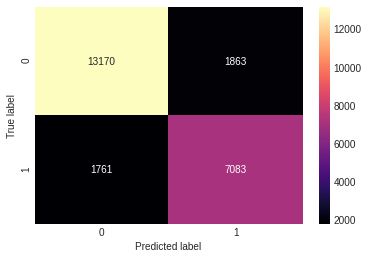

In [43]:
sns.heatmap(confusion_matrix(y_test, y_dt), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [44]:
probs = dt.predict_proba(X_test)
preds = probs[:, 1]

In [45]:
fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr, tpr),2)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.400000, G-Mean=0.838


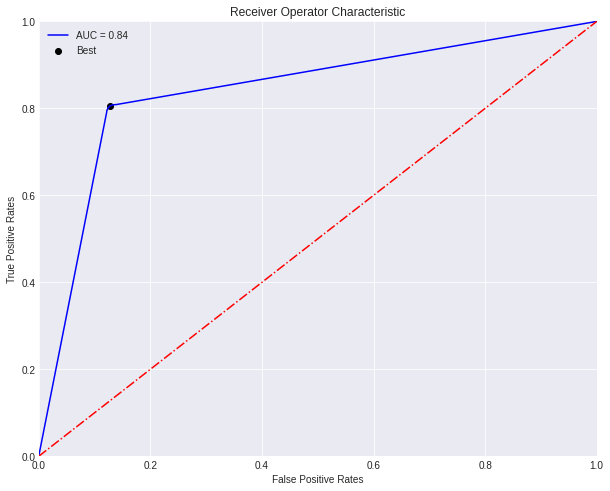

In [46]:
plt.figure(figsize=(10,8))

plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc}')
plt.plot([0,1], [0,1], 'r-.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [47]:
y_dtt = []
for i in range(len(preds)):
  if preds[i] > threshold[ix]:
    y_dtt.append(1)
  else:
    y_dtt.append(0)

y_dtt = np.array(y_dtt)

In [48]:
print(classification_report(y_test, y_dtt))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     15033
           1       0.79      0.80      0.80      8844

    accuracy                           0.85     23877
   macro avg       0.84      0.84      0.84     23877
weighted avg       0.85      0.85      0.85     23877



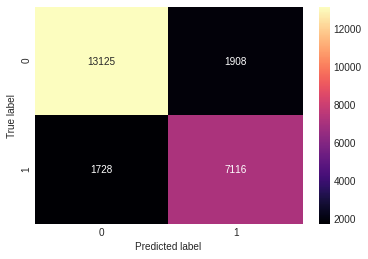

In [49]:
sns.heatmap(confusion_matrix(y_test, y_dtt), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [50]:
mod_eval.loc[2] = [
    'Decision Tree',
    auc(fpr, tpr).round(5),
    recall_score(y_test, y_dt).round(5),
    threshold[ix].round(5),
    recall_score(y_test, y_dtt).round(5)
]

### 4. Random Forest

In [51]:
rf = RandomForestClassifier()

In [52]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
y_rf = rf.predict(X_test)

In [54]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     15033
           1       0.87      0.80      0.83      8844

    accuracy                           0.88     23877
   macro avg       0.88      0.86      0.87     23877
weighted avg       0.88      0.88      0.88     23877



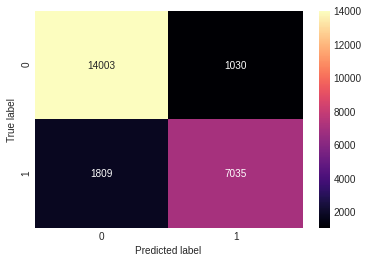

In [55]:
sns.heatmap(confusion_matrix(y_test, y_rf), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [56]:
probs = rf.predict_proba(X_test)
preds = probs[:, 1]

In [57]:
fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr, tpr),2)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.387500, G-Mean=0.873


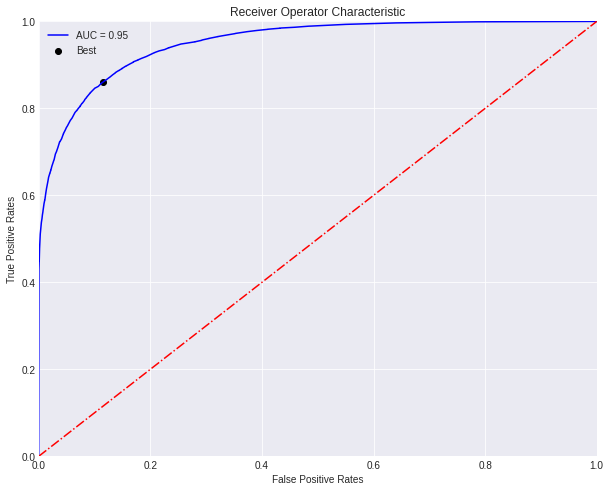

In [58]:
plt.figure(figsize=(10,8))

plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc}')
plt.plot([0,1], [0,1], 'r-.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [59]:
y_rft = []
for i in range(len(preds)):
  if preds[i] > threshold[ix]:
    y_rft.append(1)
  else:
    y_rft.append(0)

y_rft = np.array(y_rft)

In [60]:
print(classification_report(y_test, y_rft))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     15033
           1       0.81      0.86      0.84      8844

    accuracy                           0.88     23877
   macro avg       0.86      0.87      0.87     23877
weighted avg       0.88      0.88      0.88     23877



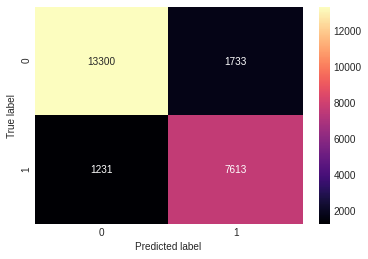

In [61]:
sns.heatmap(confusion_matrix(y_test, y_rft), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [62]:
mod_eval.loc[3] = [
    'Random Forest',
    auc(fpr, tpr).round(5),
    recall_score(y_test, y_rf).round(5),
    threshold[ix].round(5),
    recall_score(y_test, y_rft).round(5)
]

In [63]:
importance = rf.feature_importances_
fi = pd.DataFrame({'Feature': X_test.columns, 'Score': importance}).sort_values(by=['Score'], ascending=False)
fi

,Feature,Score
1,lead_time,0.137397
16,deposit_type,0.099511
20,adr,0.083981
11,country,0.082821
4,arrival_date_day_of_month,0.059678
22,total_of_special_requests,0.050442
3,arrival_date_week_number,0.048864
24,stays,0.037017
13,previous_cancellations,0.032481
6,stays_in_week_nights,0.031656


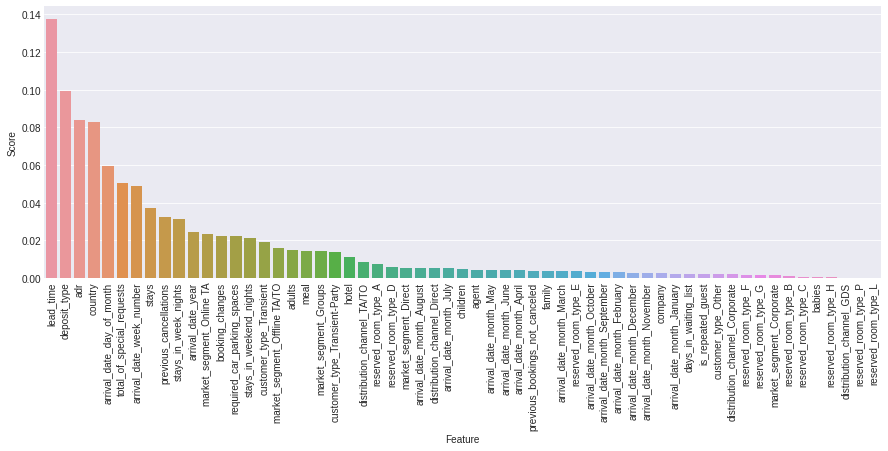

In [64]:
plt.figure(figsize=[15,5])
sns.barplot(x='Feature', y='Score', data=fi)
plt.xticks(rotation=90)
plt.show()

### 5. Support Vector Machine

In [65]:
sv = LinearSVC()
sv = CalibratedClassifierCV(base_estimator=sv)

In [66]:
sv.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None,
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=None, tol=0.0001,
                                                verbose=0),
                       cv=None, method='sigmoid')

In [67]:
y_sv = sv.predict(X_test)

In [68]:
print(classification_report(y_test, y_sv))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86     15033
           1       0.80      0.65      0.72      8844

    accuracy                           0.81     23877
   macro avg       0.81      0.78      0.79     23877
weighted avg       0.81      0.81      0.80     23877



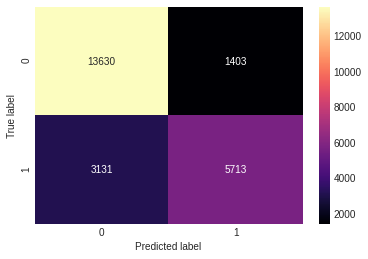

In [69]:
sns.heatmap(confusion_matrix(y_test, y_sv), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [70]:
probs = sv.predict_proba(X_test)
preds = probs[:, 1]

In [71]:
fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr, tpr),2)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.344960, G-Mean=0.796


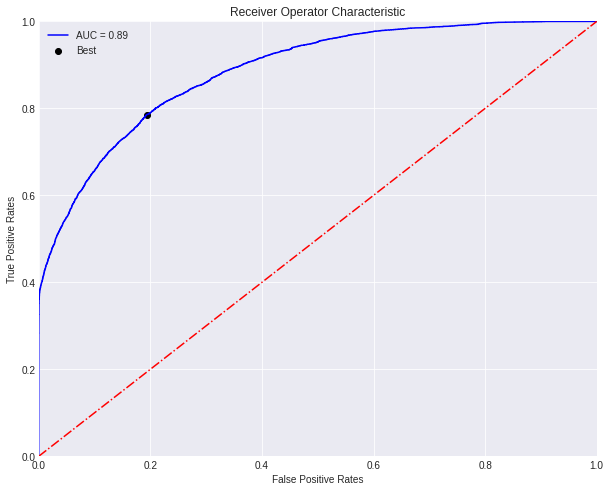

In [72]:
plt.figure(figsize=(10,8))

plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc}')
plt.plot([0,1], [0,1], 'r-.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [73]:
y_svt = []
for i in range(len(preds)):
  if preds[i] > threshold[ix]:
    y_svt.append(1)
  else:
    y_svt.append(0)

y_svt = np.array(y_svt)

In [74]:
print(classification_report(y_test, y_svt))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83     15033
           1       0.70      0.79      0.74      8844

    accuracy                           0.80     23877
   macro avg       0.78      0.80      0.79     23877
weighted avg       0.81      0.80      0.80     23877



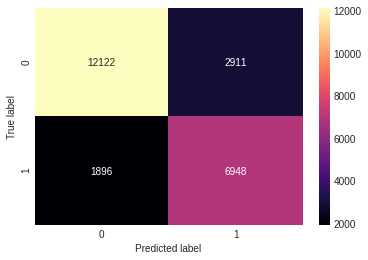

In [75]:
sns.heatmap(confusion_matrix(y_test, y_svt), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [76]:
mod_eval.loc[4] = [
    'Support Vector Machine',
    auc(fpr, tpr).round(5),
    recall_score(y_test, y_sv).round(5),
    threshold[ix].round(5),
    recall_score(y_test, y_svt).round(5)
]

### 6. K Nearest Neighbour

In [77]:
knn = KNeighborsClassifier()

In [78]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [79]:
y_knn = knn.predict(X_test)

In [80]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     15033
           1       0.79      0.74      0.76      8844

    accuracy                           0.83     23877
   macro avg       0.82      0.81      0.82     23877
weighted avg       0.83      0.83      0.83     23877



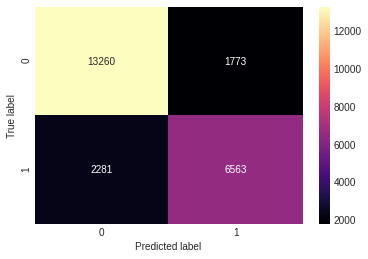

In [81]:
sns.heatmap(confusion_matrix(y_test, y_knn), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [82]:
probs = knn.predict_proba(X_test)
preds = probs[:, 1]

In [83]:
fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr, tpr),2)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.600000, G-Mean=0.809


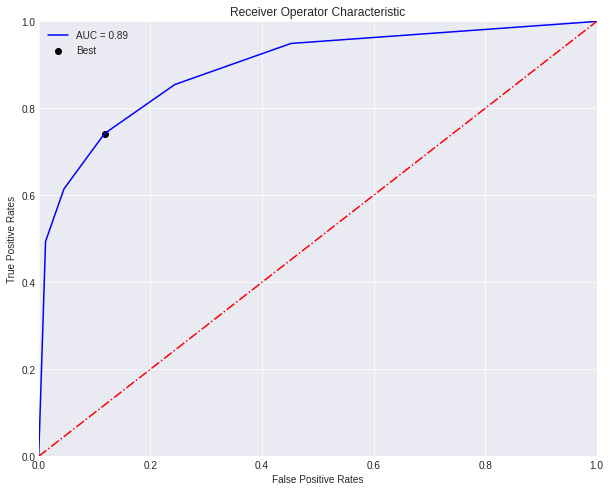

In [84]:
plt.figure(figsize=(10,8))

plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc}')
plt.plot([0,1], [0,1], 'r-.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [85]:
y_knnt = []
for i in range(len(preds)):
  if preds[i] > threshold[ix]:
    y_knnt.append(1)
  else:
    y_knnt.append(0)

y_knnt = np.array(y_knnt)

In [86]:
print(classification_report(y_test, y_knnt))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     15033
           1       0.89      0.61      0.73      8844

    accuracy                           0.83     23877
   macro avg       0.85      0.78      0.80     23877
weighted avg       0.84      0.83      0.82     23877



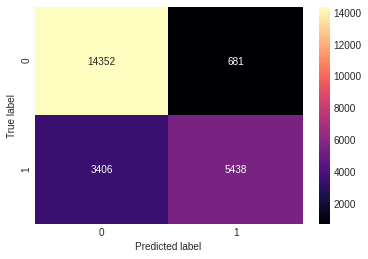

In [87]:
sns.heatmap(confusion_matrix(y_test, y_knnt), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [88]:
mod_eval.loc[5] = [
    'K Nearest Neighbour',
    auc(fpr, tpr).round(5),
    recall_score(y_test, y_knn).round(5),
    threshold[ix].round(5),
    recall_score(y_test, y_knnt).round(5)
]

### 7. Neural Network

In [89]:
nn = MLPClassifier()

In [90]:
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [91]:
y_nn = nn.predict(X_test)

In [92]:
print(classification_report(y_test, y_nn))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     15033
           1       0.82      0.80      0.81      8844

    accuracy                           0.86     23877
   macro avg       0.85      0.85      0.85     23877
weighted avg       0.86      0.86      0.86     23877



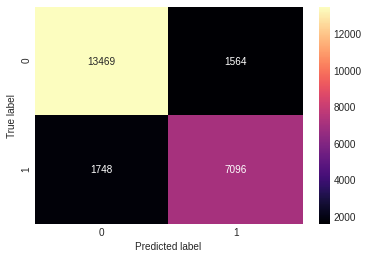

In [93]:
sns.heatmap(confusion_matrix(y_test, y_nn), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [94]:
probs = nn.predict_proba(X_test)
preds = probs[:, 1]

In [95]:
fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr, tpr),2)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.384693, G-Mean=0.854


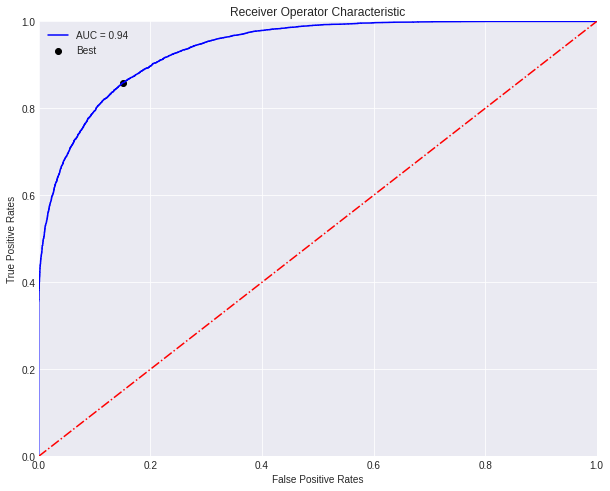

In [96]:
plt.figure(figsize=(10,8))

plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc}')
plt.plot([0,1], [0,1], 'r-.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [97]:
y_nnt = []
for i in range(len(preds)):
  if preds[i] > threshold[ix]:
    y_nnt.append(1)
  else:
    y_nnt.append(0)

y_nnt = np.array(y_nnt)

In [98]:
print(classification_report(y_test, y_nnt))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     15033
           1       0.77      0.86      0.81      8844

    accuracy                           0.85     23877
   macro avg       0.84      0.85      0.85     23877
weighted avg       0.86      0.85      0.85     23877



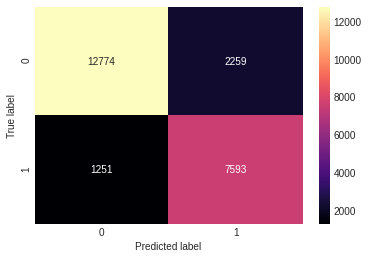

In [99]:
sns.heatmap(confusion_matrix(y_test, y_nnt), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [100]:
mod_eval.loc[6] = [
    'Multi Layer Perceptor',
    auc(fpr, tpr).round(5),
    recall_score(y_test, y_nn).round(5),
    threshold[ix].round(5),
    recall_score(y_test, y_nnt).round(5)
]

### 8. XGBoost

In [101]:
xb = xgb.XGBClassifier()

In [102]:
xb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [103]:
y_xb = xb.predict(X_test)

In [104]:
print(classification_report(y_test, y_xb))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     15033
           1       0.83      0.71      0.77      8844

    accuracy                           0.84     23877
   macro avg       0.84      0.81      0.82     23877
weighted avg       0.84      0.84      0.84     23877



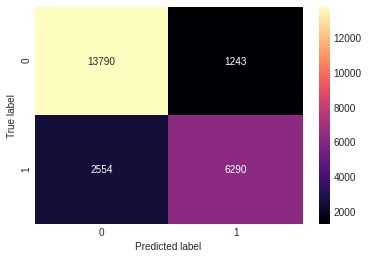

In [105]:
sns.heatmap(confusion_matrix(y_test, y_xb), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [106]:
probs = xb.predict_proba(X_test)
preds = probs[:, 1]

In [107]:
fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr, tpr),2)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.343681, G-Mean=0.824


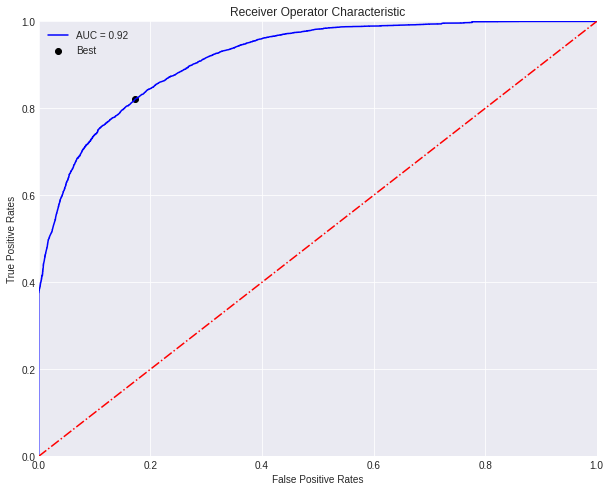

In [108]:
plt.figure(figsize=(10,8))

plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc}')
plt.plot([0,1], [0,1], 'r-.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [109]:
y_xbt = []
for i in range(len(preds)):
  if preds[i] > threshold[ix]:
    y_xbt.append(1)
  else:
    y_xbt.append(0)

y_rftt = np.array(y_xbt)

In [110]:
print(classification_report(y_test, y_xbt))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     15033
           1       0.74      0.82      0.78      8844

    accuracy                           0.83     23877
   macro avg       0.81      0.82      0.82     23877
weighted avg       0.83      0.83      0.83     23877



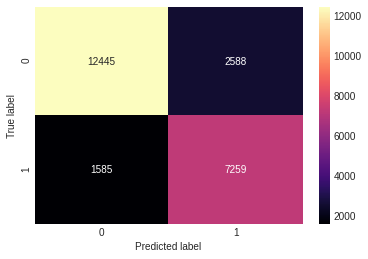

In [111]:
sns.heatmap(confusion_matrix(y_test, y_xbt), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [112]:
mod_eval.loc[7] = [
    'XGBoost',
    auc(fpr, tpr).round(5),
    recall_score(y_test, y_xb).round(5),
    threshold[ix].round(5),
    recall_score(y_test, y_xbt).round(5)
]

In [113]:
importance = xb.feature_importances_
fi = pd.DataFrame({'Feature': X_test.columns, 'Score': importance}).sort_values(by=['Score'], ascending=False)
fi

,Feature,Score
16,deposit_type,0.337327
29,market_segment_Online TA,0.119731
22,total_of_special_requests,0.073484
11,country,0.051384
21,required_car_parking_spaces,0.048511
13,previous_cancellations,0.043808
1,lead_time,0.032389
15,booking_changes,0.028259
28,market_segment_Offline TA/TO,0.027212
26,market_segment_Direct,0.027093


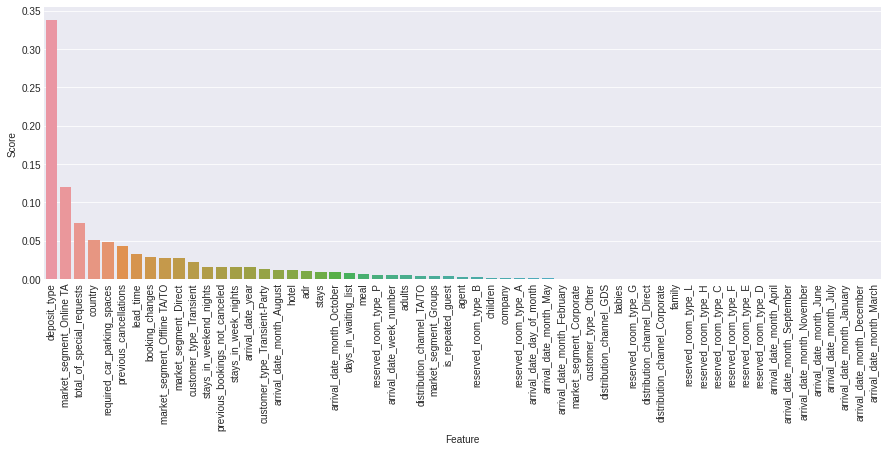

In [114]:
plt.figure(figsize=[15,5])
sns.barplot(x='Feature', y='Score', data=fi)
plt.xticks(rotation=90)
plt.show()

## Machine Learning Parameter Tuning

### 1. Random Forest

In [12]:
param = {
    'max_depth' : [None, 10, 30, 50],
    'max_features' : ['auto', 'sqrt'],
    'min_samples_leaf' : [1, 2, 4],
    'n_estimators' : [100, 500, 1000]
}

In [13]:
rf_t = GridSearchCV(RandomForestClassifier(), param, n_jobs=-1, verbose=5, scoring='recall')

In [14]:
rf_t.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 74.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 141.4min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 190.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [15]:
rf_t.best_params_

{'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [115]:
rf_t = RandomForestClassifier(
    max_depth = 50,
    max_features = 'auto',
    min_samples_leaf = 1,
    n_estimators = 500
)
rf_t.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
y_rf_t = rf_t.predict(X_test)

In [117]:
print(classification_report(y_test, y_rf_t))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     15033
           1       0.87      0.80      0.83      8844

    accuracy                           0.88     23877
   macro avg       0.88      0.87      0.87     23877
weighted avg       0.88      0.88      0.88     23877



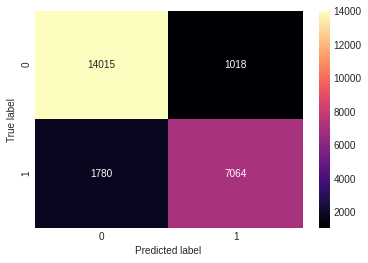

In [118]:
sns.heatmap(confusion_matrix(y_test, y_rf_t), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [119]:
probs = rf_t.predict_proba(X_test)
preds = probs[:, 1]

In [120]:
fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr, tpr),2)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.369182, G-Mean=0.875


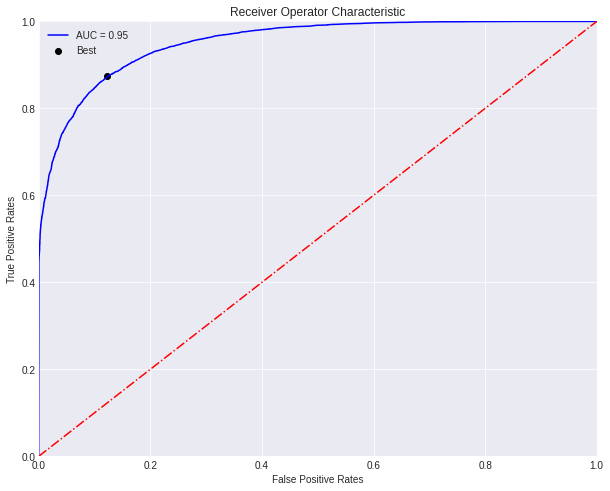

In [121]:
plt.figure(figsize=(10,8))

plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc}')
plt.plot([0,1], [0,1], 'r-.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [122]:
y_rft_t = []
for i in range(len(preds)):
  if preds[i] > threshold[ix]:
    y_rft_t.append(1)
  else:
    y_rft_t.append(0)

y_rft_t = np.array(y_rft_t)

In [123]:
print(classification_report(y_test, y_rft_t))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     15033
           1       0.81      0.87      0.84      8844

    accuracy                           0.88     23877
   macro avg       0.86      0.88      0.87     23877
weighted avg       0.88      0.88      0.88     23877



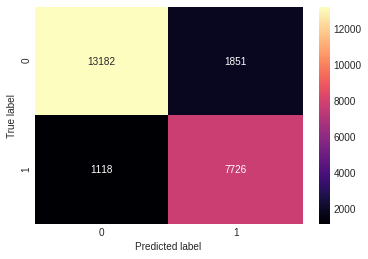

In [124]:
sns.heatmap(confusion_matrix(y_test, y_rft_t), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [125]:
mod_eval.loc[8] = [
    'Random Forest Tuning',
    auc(fpr, tpr).round(5),
    recall_score(y_test, y_rf_t).round(5),
    threshold[ix].round(5),
    recall_score(y_test, y_rft_t).round(5)
]

In [126]:
importance = rf_t.feature_importances_
fi = pd.DataFrame({'Feature' : X_test.columns, 'Score' : importance}).sort_values(by=['Score'], ascending=False)
fi

,Feature,Score
1,lead_time,0.134567
16,deposit_type,0.105181
20,adr,0.084419
11,country,0.083461
4,arrival_date_day_of_month,0.059851
22,total_of_special_requests,0.052012
3,arrival_date_week_number,0.049045
24,stays,0.036467
13,previous_cancellations,0.031518
6,stays_in_week_nights,0.031341


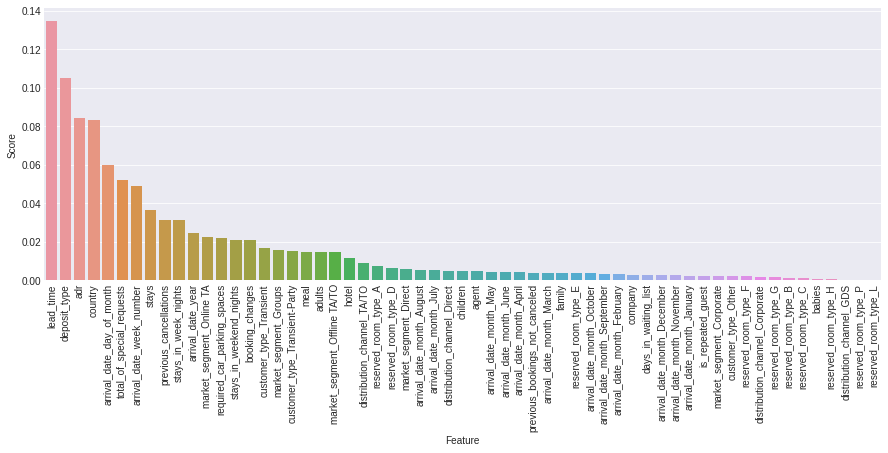

In [127]:
plt.figure(figsize=(15,5))
sns.barplot(x='Feature', y='Score', data=fi)
plt.xticks(rotation=90)
plt.show()

### 2. Neural Network

In [25]:
param = {
    'hidden_layer_sizes' : [(10,), (50,), (100,)],
    'activation' : ['tanh', 'relu'],
    'solver' : ['adam', 'sgd'],
    'alpha' : [0.0001, 0.05],
    'learning_rate' : ['constant','adaptive']
}

In [26]:
nn_t = GridSearchCV(MLPClassifier(max_iter=100), param, n_jobs=-1, verbose=5, scoring='recall')

In [27]:
nn_t.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 53.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [28]:
nn_t.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [128]:
nn_t = MLPClassifier(
    max_iter=100,
    activation = 'tanh',
    alpha = 0.0001,
    hidden_layer_sizes = (100,),
    learning_rate = 'constant',
    solver = 'adam'
)
nn_t.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [129]:
y_nn_t = nn_t.predict(X_test)

In [130]:
print(classification_report(y_test, y_nn_t))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     15033
           1       0.83      0.78      0.81      8844

    accuracy                           0.86     23877
   macro avg       0.85      0.85      0.85     23877
weighted avg       0.86      0.86      0.86     23877



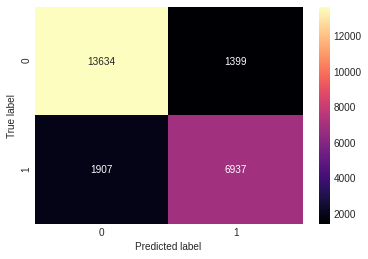

In [131]:
sns.heatmap(confusion_matrix(y_test, y_nn_t), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [132]:
probs = nn_t.predict_proba(X_test)
preds = probs[:, 1]

In [133]:
fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr, tpr),2)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.332552, G-Mean=0.855


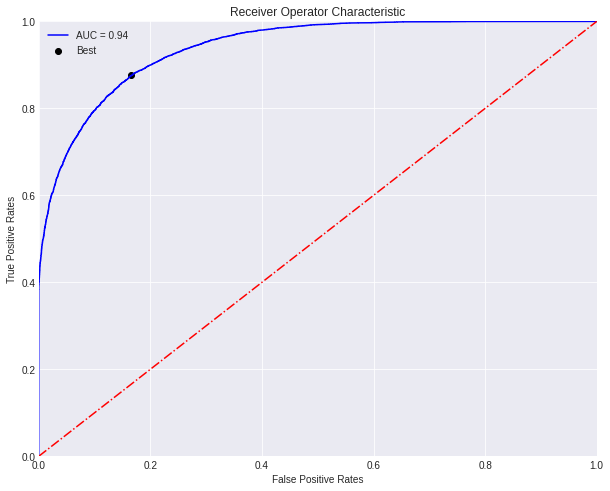

In [134]:
plt.figure(figsize=(10,8))

plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc}')
plt.plot([0,1], [0,1], 'r-.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [135]:
y_nnt_t = []
for i in range(len(preds)):
  if preds[i] > threshold[ix]:
    y_nnt_t.append(1)
  else:
    y_nnt_t.append(0)

y_nnt_t = np.array(y_nnt_t)

In [136]:
print(classification_report(y_test, y_nnt_t))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87     15033
           1       0.76      0.88      0.81      8844

    accuracy                           0.85     23877
   macro avg       0.84      0.86      0.84     23877
weighted avg       0.86      0.85      0.85     23877



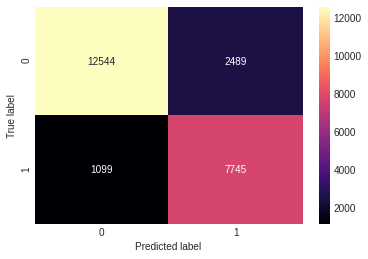

In [137]:
sns.heatmap(confusion_matrix(y_test, y_nnt_t), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [138]:
mod_eval.loc[9] = [
    'Multi Layer Perception Tuning',
    auc(fpr, tpr).round(5),
    recall_score(y_test, y_nn_t).round(5),
    threshold[ix].round(5),
    recall_score(y_test, y_nnt_t).round(5)
]

### 3. XGBoost

In [40]:
param = {
    'max_depth' : np.arange(1,11,4),
    'learning_rate' : np.logspace(-2, 0, 2),
    'subsample' : [.3, .8, 1],
    'gamma' : np.arange(1,11,4),
    'colsample_bytree' : [.3, .8, 1],
    'min_child_weight' : [1, 5, 10]
}

In [41]:
xgb_t = GridSearchCV(XGBClassifier(), param, n_jobs=-1, verbose=5, scoring='recall')

In [42]:
xgb_t.fit(X_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 67.0min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 104.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 145.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 191.1min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed: 249.7min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 289.1min finished


[03:02:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     use_label_encoder=True,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.8, 1],
                         'gamma': array(

In [43]:
xgb_t.best_params_

{'colsample_bytree': 1,
 'gamma': 1,
 'learning_rate': 1.0,
 'max_depth': 9,
 'min_child_weight': 1,
 'subsample': 1}

In [139]:
xgb_t = xgb.XGBClassifier(
    colsample_bytree=1,
    gamma = 1,
    learning_rate = 1,
    max_depth = 9,
    min_child_weight = 1,
    subsample = 1
)
xgb_t.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, learning_rate=1,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [140]:
y_xgb_t = xgb_t.predict(X_test)

In [141]:
print(classification_report(y_test, y_xgb_t))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     15033
           1       0.83      0.81      0.82      8844

    accuracy                           0.87     23877
   macro avg       0.86      0.85      0.86     23877
weighted avg       0.87      0.87      0.87     23877



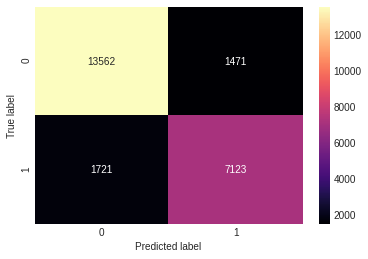

In [142]:
sns.heatmap(confusion_matrix(y_test, y_xgb_t), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [143]:
probs = xgb_t.predict_proba(X_test)
preds = probs[:, 1]

In [144]:
fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr, tpr),2)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.365496, G-Mean=0.860


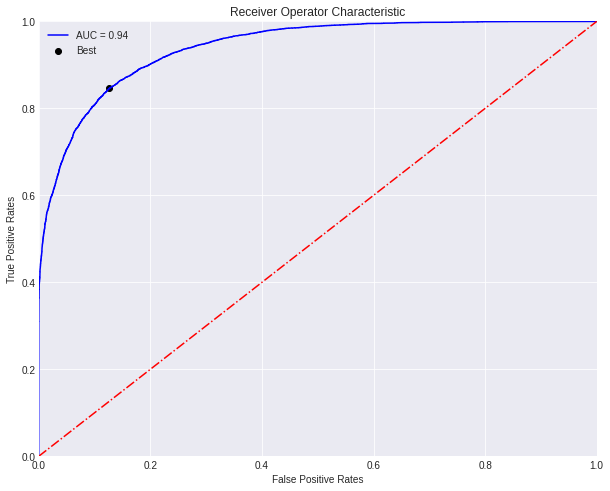

In [145]:
plt.figure(figsize=(10,8))

plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc}')
plt.plot([0,1], [0,1], 'r-.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [146]:
y_xgbt_t = []
for i in range(len(preds)):
  if preds[i] > threshold[ix]:
    y_xgbt_t.append(1)
  else:
    y_xgbt_t.append(0)

y_xgbt_t = np.array(y_xgbt_t)

In [147]:
print(classification_report(y_test, y_xgbt_t))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     15033
           1       0.80      0.85      0.82      8844

    accuracy                           0.86     23877
   macro avg       0.85      0.86      0.86     23877
weighted avg       0.87      0.86      0.86     23877



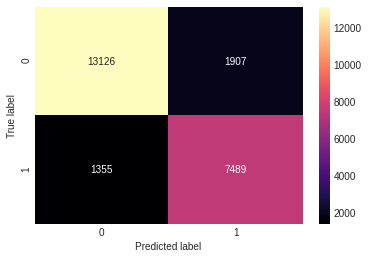

In [148]:
sns.heatmap(confusion_matrix(y_test, y_xgbt_t), annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [149]:
mod_eval.loc[10] = [
    'XGBoost Tuning',
    auc(fpr, tpr).round(5),
    recall_score(y_test, y_xgb_t).round(5),
    threshold[ix].round(5),
    recall_score(y_test, y_xgbt_t).round(5)
]

In [150]:
importance = xgb_t.feature_importances_
fi = pd.DataFrame({'Feature' : X_test.columns, 'Score' : importance}).sort_values(by=['Score'], ascending=False)
fi

,Feature,Score
16,deposit_type,0.743770
21,required_car_parking_spaces,0.061242
13,previous_cancellations,0.031100
29,market_segment_Online TA,0.023905
14,previous_bookings_not_canceled,0.010377
51,reserved_room_type_P,0.010128
22,total_of_special_requests,0.009901
11,country,0.009772
57,customer_type_Transient,0.009044
2,arrival_date_year,0.005038


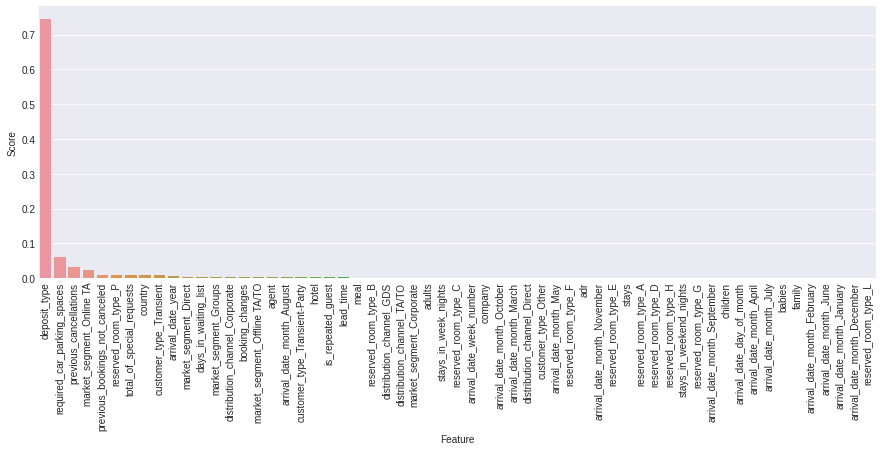

In [151]:
plt.figure(figsize=(15,5))
sns.barplot(x='Feature', y='Score', data=fi)
plt.xticks(rotation=90)
plt.show()

## Model Evaluation

In [152]:
mod_eval.sort_values(by=['AUC'], ascending=False).set_index('Model')

,AUC,Recall,Threshold,Recall Threshold
Model,,,,
Random Forest Tuning,0.95198,0.79873,0.36918,0.87359
Random Forest,0.95071,0.79545,0.38750,0.86081
XGBoost Tuning,0.94057,0.80540,0.36550,0.84679
Multi Layer Perception Tuning,0.94020,0.78437,0.33255,0.87573
Multi Layer Perceptor,0.93929,0.80235,0.38469,0.85855
XGBoost,0.91703,0.71122,0.34368,0.82078
K Nearest Neighbour,0.89303,0.74209,0.60000,0.61488
Logistic Regression,0.88674,0.63297,0.32242,0.74740
Support Vector Machine,0.88625,0.64597,0.34496,0.78562


Model yang digunakan adalah Random Forest setelah di tuning karena skor AUC nya yang paling besar

## Save Model and Parameter

In [1]:
# import joblib

In [2]:
# joblib.dump(rf_t,'model')
# joblib.dump(threshold[ix], 'thresh')
# joblib.dump(rsc, 'scaler')